In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal, fftpack

In [4]:
# create a test signal
N = 2*2621440*4
Fs = 5.125e9
F = 1e9
t = np.arange(N)
sig_in = 4095*(np.cos(2*np.pi*F/Fs*t)) + 10
#sig_in = 1024*np.random.randn(N) + 16
#sig_in = np.floor(sig_in)
print(max(sig_in))

4105.0


In [187]:
# multi tone
f_array = np.linspace(-2.5e9,-500e6,10)
sig_in = np.zeros(N)
for item in f_array:
    sig_in = sig_in + 1024*(np.cos(2*np.pi*item/Fs*t))
sig_in = sig_in + 10
sig_in = np.floor(sig_in)
print(max(sig_in))

10250.0


In [1]:
def removeDCOffset(sig_in):
    # model the filter
    N = sig_in.size
    accum = np.zeros(N)
    offset = np.zeros(N)
    gain = 100
    samp_out = np.zeros(N)
    accum[-1] = 2**21

    # make the loop
    for x, item in enumerate(sig_in):
        offset[x] = np.floor(accum[x-1] / 2**21)
        samp_out[x] = item - offset[x]
        if (samp_out[x] > 0):
            accum[x] = accum[x-1] + gain
        else:
            accum[x] = accum[x-1] - gain
    return samp_out, offset

In [5]:

samp_out = removeDCOffset(sig_in)
        

(50, 150)

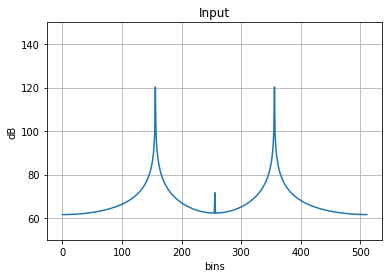

In [251]:
# plot things
plt.figure()
plt.plot(20*np.log10(np.abs(fftpack.fftshift(fftpack.fft(sig_in[-512:])))))
plt.grid(True)
plt.xlabel('bins')
plt.ylabel('dB')
plt.title('Input')
plt.ylim(50,150)

In [ ]:
# plot things
plt.figure()
plt.plot(20*np.log10(np.abs(fftpack.fftshift(fftpack.fft(samp_out[-512:])))))
plt.grid(True)
plt.xlabel('bins')
plt.ylabel('dB')
plt.title('Output')
plt.ylim(50,150)